<a href="https://colab.research.google.com/github/Moxomio/Assg-ML-1/blob/main/Tutorial_3/Tutorial_3_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Exercise 1
### Regression
#### Build a regression model to estimate the weight based on height

In [2]:
import sys
from pandas import read_csv, get_dummies
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

# Determine the environment
is_colab = 'google.colab' in sys.modules
# # Load the dataset conditionally
if is_colab:
    # Code for Google Colab environment
    df = read_csv("https://raw.githubusercontent.com/wooihaw/ERA3036_T2310/main/data/genders_heights_weights.csv")
else:
    # Code for local Jupyter Notebook environment
    df = read_csv("../data/genders_heights_weights.csv")

X1 = df.drop(columns=['Gender', 'Weight'])
y1 = df['Weight']
X1_train, X1_test, y1_train, y1_test = split(X1, y1, train_size=0.75, random_state=42)

To do:
- Build a linear regression model (name it as lnr1) to estimate weight using height
- Evaluate the model's performance with R2 score

In [5]:
lnr1 = LinearRegression().fit(X1_train, y1_train)
lnr1.score(X1_test, y1_test)


0.8573115456970968

In [6]:
h = eval(input('Enter height: '))
print(f'Estimated weight is: {lnr1.predict([[h]])}kg')

Enter height: 165
Estimated weight is: [68.28516533]kg


To do:
- Apply categorical encoding using the get_dummies() function from pandas
- Print 5 random data samples

In [7]:
df2 = get_dummies(df, columns=['Gender'])
df2.sample(5)

,Height,Weight,Gender_Female,Gender_Male
2146,171.3,82.2,False,True
8424,161.4,59.1,True,False
9737,168.3,63.9,True,False
2915,175.9,87.1,False,True
2921,173.7,76.3,False,True


To do:
- Separate into fetures and targets
- Split to training and testing sets

In [8]:
X2= df2.drop(columns=['Weight'])
y2 = df2['Weight']
X2_train, X2_test, y2_train, y2_test = split (X2, y2, train_size=0.75, random_state=42)

To do:
- Build another linear regression model (named it as lnr2) to estimate the weight based on height and both genders
- Evaluate the model's performance with R2 score

In [11]:
lnr2 = LinearRegression().fit(X2_train, y2_train)
print(f'R2 score:(lnr2.score(X2_test, y2_test))')

R2 score:(lnr2.score(X2_test, y2_test))


In [12]:
h = eval(input('Enter height: '))
g = eval(input('Enter gender (0 for male, 1 for female): '))
print(f'Estimated weight is: {lnr2.predict([[h, g, 1-g]])}kg')

Enter height: 165
Enter gender (0 for male, 1 for female): 0
Estimated weight is: [73.79303953]kg


## Exercise 2
### Classification
#### Compare 8 classification models for handwritten digit recognition

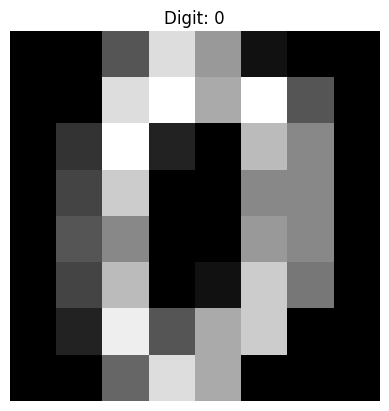

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

X, y = load_digits(return_X_y=True)

# View one of the image
plt.imshow(X[0, :].reshape(8, 8), cmap='gray')
plt.axis(False)
plt.title(f'Digit: {y[0]}')
plt.show()

To do:
- Check the number of features in the dataset

In [20]:
X.shape
print(f"NUmber of features : {X.shape[1]}")

NUmber of features : 64


To do:
- Use spot-checking technique to compare 8 classification models

In [30]:
models = {} # Initialize models as a dictionary
models['KNN'] = KNeighborsClassifier()
models['LGR'] = LogisticRegression()
models['MNB'] = MultinomialNB()
models['SVC'] = SVC()
models['DTC'] = DecisionTreeClassifier()
models['RFC'] = RandomForestClassifier()
models['GBC'] = GradientBoostingClassifier()
models['MLP'] = MLPClassifier()

# Assuming 'KFold' is intended and 'kFold' was a typo
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name in models:
    cv_results = cross_val_score(models[name], X, y, cv=kf, scoring='accuracy', n_jobs=-1)  # Removed extra comma in scoring
    print(f'{name}: {cv_results.mean():.3f}, {cv_results.std():.3f}') # Removed the '%' from std in the print statement

KNN: 0.986, 0.008
LGR: 0.962, 0.004
MNB: 0.901, 0.011
SVC: 0.988, 0.001
DTC: 0.853, 0.014
RFC: 0.975, 0.010
GBC: 0.967, 0.020
MLP: 0.974, 0.005


To do:
- Use Univariate Selection to select 20 best features. Evaluate the performance of the 8 classifiction models above on these features using 5-fold cross validation.

In [34]:
fs= SelectKBest(k=20)
X_fs = fs.fit_transform(X, y)
for name in models:
  cv_results= cross_val_score(models[name],X, y, cv=kf, scoring='accuracy', n_jobs=-1)
  print(f'{name}; {cv_results.mean():.3f}, {cv_results.std():.3f}')

KNN; 0.986, 0.008
LGR; 0.962, 0.004
MNB; 0.901, 0.011
SVC; 0.988, 0.001
DTC; 0.856, 0.017
RFC; 0.976, 0.007
GBC; 0.965, 0.020
MLP; 0.975, 0.003


To do:  
- Use PCA to reduce the dimensionality of the dataset to 20 features. Evaluate the performance of the 8 classifiction models above on these features using 5-fold cross validation.

In [39]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

for name in models:
  try:
    cv_results = cross_val_score(models[name], X_pca, y, cv=kf, scoring='accuracy', n_jobs=-1)
  except:
    print(f'{name} is not applicable to this dataset')
    continue
  print(f'{name}: {cv_results.mean():.3%}, {cv_results.std():.3%}')

KNN: 98.553%, 0.956%
LGR: 94.268%, 0.334%
MNB is not applicable to this dataset
SVC: 98.776%, 0.451%
DTC: 86.256%, 1.242%
RFC: 97.050%, 1.082%
GBC: 94.602%, 1.490%
MLP: 97.551%, 0.714%
